In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import datasets, linear_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/communities.data",na_values = "?")
data

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,0.17,0.34,0.47,0.29,0.32,0.2,1.1,0.37,0.72,0.34.1,0.6,0.29.1,0.15,0.43,0.39,0.4,0.39.1,0.32.1,0.27,0.27.1,0.36,0.41,0.08,0.19.1,0.1,0.18,0.48,0.27.2,0.68,0.23,...,0.35.1,0.38,0.34.2,0.38.1,0.46,0.25.1,0.04.1,0,0.12.1,0.42,0.5.1,0.51.1,0.64,0.03.1,0.13.1,0.96,0.17.1,0.06.2,0.18.2,0.44,0.13.2,0.94,0.93,0.03.2,0.07.2,0.1.1,0.07.3,0.02.1,0.57,0.29.2,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
1,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
2,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
3,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
4,6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,0.04,1.0,0.52,0.68,0.20,0.61,0.28,0.15,0.25,0.62,0.72,0.76,0.77,0.28,0.52,0.48,0.60,0.01,0.12,0.13,0.12,0.80,0.10,0.65,0.19,...,0.63,0.68,0.62,0.47,0.59,0.11,0.00,0.00,0.70,0.42,0.49,0.73,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.0,0.42,0.74,0.14,0.64,0.30,0.06,0.46,0.41,0.49,0.50,0.27,0.00,0.16,0.36,0.52,0.01,0.16,0.08,0.11,0.65,0.12,0.71,0.17,...,0.39,0.41,0.41,0.50,0.48,0.39,0.00,0.00,0.22,0.28,0.34,0.48,0.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1989,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,0.06,1.0,0.28,0.76,0.10,0.30,0.26,0.37,0.48,0.24,0.18,0.20,0.26,0.18,0.20,0.23,0.26,0.04,0.32,0.33,0.37,0.22,0.24,0.77,0.10,...,0.54,0.61,0.54,0.69,0.67,0.31,0.01,0.00,0.53,0.25,0.17,0.10,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1990,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,0.17,1.0,0.31,0.47,0.17,0.45,0.58,0.48,0.57,0.35,0.31,0.34,0.25,0.19,0.28,0.22,0.28,0.12,0.31,0.52,0.58,0.21,0.50,0.46,0.63,...,0.34,0.39,0.37,0.52,0.58,0.53,0.06,0.02,0.25,0.68,0.61,0.79,0.76,0.06,0.30,0.93,0.36,0.04,0.17,0.19,0.30,0.97,0.70,0.15,0.34,0.0,0.34,0.10,0.36,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1991,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,

In [ ]:
Preprocessed_data = data.drop(['8','?','?.1','Lakewoodcity','1'],axis='columns',inplace=False)
Preprocessed_data

,0.19,0.33,0.02,0.9,0.12,0.17,0.34,0.47,0.29,0.32,0.2,1.1,0.37,0.72,0.34.1,0.6,0.29.1,0.15,0.43,0.39,0.4,0.39.1,0.32.1,0.27,0.27.1,0.36,0.41,0.08,0.19.1,0.1,0.18,0.48,0.27.2,0.68,0.23,0.41.1,0.25,0.52,0.68.1,0.4.1,...,0.35.1,0.38,0.34.2,0.38.1,0.46,0.25.1,0.04.1,0,0.12.1,0.42,0.5.1,0.51.1,0.64,0.03.1,0.13.1,0.96,0.17.1,0.06.2,0.18.2,0.44,0.13.2,0.94,0.93,0.03.2,0.07.2,0.1.1,0.07.3,0.02.1,0.57,0.29.2,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
2,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
3,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
4,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,0.04,1.0,0.52,0.68,0.20,0.61,0.28,0.15,0.25,0.62,0.72,0.76,0.77,0.28,0.52,0.48,0.60,0.01,0.12,0.13,0.12,0.80,0.10,0.65,0.19,0.77,0.06,0.91,0.49,0.57,...,0.63,0.68,0.62,0.47,0.59,0.11,0.00,0.00,0.70,0.42,0.49,0.73,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.0,0.42,0.74,0.14,0.64,0.30,0.06,0.46,0.41,0.49,0.50,0.27,0.00,0.16,0.36,0.52,0.01,0.16,0.08,0.11,0.65,0.12,0.71,0.17,0.68,0.14,0.70,0.39,0.41,...,0.39,0.41,0.41,0.50,0.48,0.39,0.00,0.00,0.22,0.28,0.34,0.48,0.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1989,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,0.06,1.0,0.28,0.76,0.10,0.30,0.26,0.37,0.48,0.24,0.18,0.20,0.26,0.18,0.20,0.23,0.26,0.04,0.32,0.33,0.37,0.22,0.24,0.77,0.10,0.41,0.22,0.24,0.42,0.75,...,0.54,0.61,0.54,0.69,0.67,0.31,0.01,0.00,0.53,0.25,0.17,0.10,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1990,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,0.17,1.0,0.31,0.47,0.17,0.45,0.58,0.48,0.57,0.35,0.31,0.34,0.25,0.19,0.28,0.22,0.28,0.12,0.31,0.52,0.58,0.21,0.50,0.46,0.63,0.40,0.54,0.32,0.50,0.53,...,0.34,0.39,0.37,0.52,0.58,0.53,0.06,0.02,0.25,0.68,0.61,0.79,0.76,0.06,0.30,0.93,0.36,0.04,0.17,0.19,0.30,0.97,0.70,0.15,0.34,0.0,0.34,0.10,0.36,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1991,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,0.09,1.0,0.44,0.64,0.21,0.55,0.42,0.24,0.45,0.47,0.40,0

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant')
imp_mean

SimpleImputer(strategy='constant')

In [ ]:
Preprocessed_data = imp_mean.fit_transform(Preprocessed_data)
Preprocessed_data = pd.DataFrame(Preprocessed_data)
Preprocessed_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122
0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.02,0.12,0.45,0.00,0.00,0.00,0.0,0.00,0.00,0.67
1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.01,0.21,0.02,0.00,0.00,0.00,0.0,0.00,0.00,0.43
2,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.02,0.39,0.28,0.00,0.00,0.00,0.0,0.00,0.00,0.12
3,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.04,0.09,0.02,0.00,0.00,0.00,0.0,0.00,0.00,0.03
4,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,0.04,1.0,0.52,0.68,0.20,0.61,0.28,0.15,0.25,0.62,0.72,0.76,0.77,0.28,0.52,0.48,0.60,0.01,0.12,0.13,0.12,0.80,0.10,0.65,0.19,0.77,0.06,0.91,0.49,0.57,...,0.63,0.68,0.62,0.47,0.59,0.11,0.00,0.00,0.70,0.42,0.49,0.73,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.01,0.58,0.10,0.00,0.00,0.00,0.0,0.00,0.00,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.0,0.42,0.74,0.14,0.64,0.30,0.06,0.46,0.41,0.49,0.50,0.27,0.00,0.16,0.36,0.52,0.01,0.16,0.08,0.11,0.65,0.12,0.71,0.17,0.68,0.14,0.70,0.39,0.41,...,0.39,0.41,0.41,0.50,0.48,0.39,0.00,0.00,0.22,0.28,0.34,0.48,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.01,0.28,0.05,0.00,0.00,0.00,0.0,0.00,0.00,0.09
1989,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,0.06,1.0,0.28,0.76,0.10,0.30,0.26,0.37,0.48,0.24,0.18,0.20,0.26,0.18,0.20,0.23,0.26,0.04,0.32,0.33,0.37,0.22,0.24,0.77,0.10,0.41,0.22,0.24,0.42,0.75,...,0.54,0.61,0.54,0.69,0.67,0.31,0.01,0.00,0.53,0.25,0.17,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.02,0.37,0.20,0.00,0.00,0.00,0.0,0.00,0.00,0.45
1990,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,0.17,1.0,0.31,0.47,0.17,0.45,0.58,0.48,0.57,0.35,0.31,0.34,0.25,0.19,0.28,0.22,0.28,0.12,0.31,0.52,0.58,0.21,0.50,0.46,0.63,0.40,0.54,0.32,0.50,0.53,...,0.34,0.39,0.37,0.52,0.58,0.53,0.06,0.02,0.25,0.68,0.61,0.79,0.76,0.06,0.30,0.93,0.36,0.04,0.17,0.19,0.30,0.97,0.70,0.15,0.34,0.0,0.34,0.10,0.36,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1991,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,0.09,1.0,0.44,0.64,0.21,0.55,0.42,0.24,0.45,0.47,0.40,0.40,0.29,0.20,0.31,0.27,0.37,0.03,0.16,0.30,0.35,0.42,0.37,0.57,0.44,0.

In [ ]:
X = Preprocessed_data.iloc[:,:-1]
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121
0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,...,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.02,0.12,0.45,0.00,0.00,0.00,0.0,0.00,0.00
1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,...,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.01,0.21,0.02,0.00,0.00,0.00,0.0,0.00,0.00
2,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,...,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.02,0.39,0.28,0.00,0.00,0.00,0.0,0.00,0.00
3,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,...,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.04,0.09,0.02,0.00,0.00,0.00,0.0,0.00,0.00
4,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,0.04,1.0,0.52,0.68,0.20,0.61,0.28,0.15,0.25,0.62,0.72,0.76,0.77,0.28,0.52,0.48,0.60,0.01,0.12,0.13,0.12,0.80,0.10,0.65,0.19,0.77,0.06,0.91,0.49,0.57,...,0.67,0.63,0.68,0.62,0.47,0.59,0.11,0.00,0.00,0.70,0.42,0.49,0.73,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.01,0.58,0.10,0.00,0.00,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.0,0.42,0.74,0.14,0.64,0.30,0.06,0.46,0.41,0.49,0.50,0.27,0.00,0.16,0.36,0.52,0.01,0.16,0.08,0.11,0.65,0.12,0.71,0.17,0.68,0.14,0.70,0.39,0.41,...,0.45,0.39,0.41,0.41,0.50,0.48,0.39,0.00,0.00,0.22,0.28,0.34,0.48,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.01,0.28,0.05,0.00,0.00,0.00,0.0,0.00,0.00
1989,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,0.06,1.0,0.28,0.76,0.10,0.30,0.26,0.37,0.48,0.24,0.18,0.20,0.26,0.18,0.20,0.23,0.26,0.04,0.32,0.33,0.37,0.22,0.24,0.77,0.10,0.41,0.22,0.24,0.42,0.75,...,0.54,0.54,0.61,0.54,0.69,0.67,0.31,0.01,0.00,0.53,0.25,0.17,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.02,0.37,0.20,0.00,0.00,0.00,0.0,0.00,0.00
1990,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,0.17,1.0,0.31,0.47,0.17,0.45,0.58,0.48,0.57,0.35,0.31,0.34,0.25,0.19,0.28,0.22,0.28,0.12,0.31,0.52,0.58,0.21,0.50,0.46,0.63,0.40,0.54,0.32,0.50,0.53,...,0.28,0.34,0.39,0.37,0.52,0.58,0.53,0.06,0.02,0.25,0.68,0.61,0.79,0.76,0.06,0.30,0.93,0.36,0.04,0.17,0.19,0.30,0.97,0.70,0.15,0.34,0.0,0.34,0.10,0.36,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28
1991,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,0.09,1.0,0.44,0.64,0.21,0.55,0.42,0.24,0.45,0.47,0.40,0.40,0.29,0.20,0.31,0.27,0.37,0.03,0.16,0.30,0.35,0.42,0.37,0.57,0.44,0.5

In [ ]:
Y = Preprocessed_data.iloc[:,-1]
Y

0       0.67
1       0.43
2       0.12
3       0.03
4       0.14
        ... 
1988    0.09
1989    0.45
1990    0.23
1991    0.19
1992    0.48
Name: 122, Length: 1993, dtype: float64

In [ ]:
from sklearn.utils import shuffle
s_shuff = shuffle(Preprocessed_data)
s_shuff

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122
1876,0.05,0.36,0.01,0.98,0.04,0.01,0.48,0.55,0.43,0.52,0.06,1.0,0.21,0.48,0.13,0.38,0.58,0.49,0.33,0.25,0.24,0.23,0.12,0.09,0.20,0.45,0.36,0.05,0.36,0.72,0.64,0.14,0.48,0.46,0.60,0.44,0.61,0.25,0.60,0.46,...,0.25,0.26,0.21,0.46,0.41,0.58,0.03,0.00,0.16,0.80,0.51,0.76,0.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.10,0.05,0.00,0.00,0.00,0.0,0.00,0.00,0.15
1422,0.01,0.24,0.00,0.99,0.01,0.01,0.27,0.41,0.27,0.71,0.00,0.0,0.22,0.40,0.13,0.58,0.67,0.25,0.44,0.28,0.30,0.29,0.04,0.00,0.15,0.24,0.28,0.01,0.21,0.61,0.60,0.17,0.16,0.48,0.88,0.21,0.86,0.23,0.53,0.29,...,0.22,0.23,0.23,0.33,0.39,0.39,0.00,0.00,0.03,0.85,0.64,0.71,0.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.33,0.03,0.00,0.00,0.00,0.0,0.00,0.00,0.06
1751,0.02,0.48,0.23,0.76,0.18,0.06,0.28,0.34,0.21,0.48,0.03,1.0,0.76,0.66,0.16,0.77,0.50,0.10,0.52,0.75,0.70,0.72,0.52,0.85,0.28,0.60,0.63,0.01,0.07,0.18,0.19,0.79,0.17,0.65,0.27,0.61,0.11,0.80,0.19,0.41,...,0.61,0.79,0.68,0.52,0.61,0.64,0.00,0.00,0.39,0.53,0.76,0.65,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.47,0.98,0.00,0.00,0.00,0.0,0.00,0.00,0.19
1592,0.00,0.47,0.00,0.97,0.11,0.01,0.30,0.30,0.23,0.77,0.02,1.0,0.50,0.43,0.08,0.86,0.83,0.06,1.00,0.48,0.41,0.39,0.26,0.14,0.82,0.00,0.66,0.00,0.04,0.25,0.37,0.26,0.24,0.34,0.44,0.34,0.35,0.41,0.07,0.32,...,0.37,0.54,0.38,0.27,0.20,0.29,0.00,0.00,0.32,0.81,0.99,0.95,0.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.21,0.14,0.00,0.00,0.00,0.0,0.00,0.00,0.02
969,0.80,0.37,0.91,0.23,0.06,0.08,0.39,0.49,0.31,0.46,0.80,1.0,0.10,0.24,0.09,0.22,0.56,1.00,0.51,0.13,0.14,0.19,0.19,0.16,0.18,0.23,0.23,1.00,0.76,0.43,0.73,0.11,0.99,0.19,0.53,0.42,0.67,0.20,0.83,0.65,...,0.14,0.15,0.16,0.66,0.33,0.49,0.34,0.24,0.12,0.70,0.67,0.91,0.85,0.38,0.35,0.64,0.39,0.52,0.40,0.39,0.35,0.51,0.55,0.62,0.09,0.01,0.49,0.22,0.57,0.23,0.22,0.55,0.80,0.61,0.34,0.62,0.5,0.34,0.29,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,0.56,0.49,0.53,0.48,0.04,1.00,0.33,0.42,0.27,0.54,0.57,1.0,0.09,0.40,0.17,0.15,0.47,0.89,0.22,0.09,0.16,0.21,0.16,0.11,0.27,0.21,0.31,1.00,0.83,1.00,0.94,0.19,0.75,0.31,0.31,0.27,0.57,0.22,0.86,0.58,...,0.27,0.31,0.26,0.86,0.65,0.43,0.52,0.61,1.00,0.17,0.44,0.68,0.46,0.54,0.68,0.61,0.56,1.00,1.00,0.54,0.68,0.99,0.35,0.38,0.67,0.01,0.71,0.49,0.86,0.43,0.10,0.84,0.73,1.00,0.64,0.15,0.5,0.56,0.73,1.00
1606,0.04,1.00,0.07,0.45,0.48,1.00,0.62,0.70,0.49,0.17,0.06,1.0,0.36,0.72,0.12,0.13,0.35,0.69,0.32,0.30,0.13,0.13,0.30,0.14,0.22,0.25,0.28,0.05,0.36,0.80,0.88,0.10,0.62,0.46,0.66,0.20,0.81,0.13,0.40,0.64,...,0.52,0.61,0.51,0.76,0.64,0.22,0.00,0.00,1.00,0.46,0.58,0.83,0.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.89,0.29,0.00,0.00,0.00,0.0,0.00,0.00,0.69
101,0.18,0.26,0.17,0.82,0.08,0.22,0.25,0.33,0.20,0.76,0.19,1.0,0.26,0.31,0.13,0.49,0.74,0.24,0.42,0.30,0.38,0.40,0.19,0.26,0.31,0.28,0.36,0.12,0.28,0.29,0.47,0.24,0.37,0.37,0.20,0.35,0.30,0.37,0.67,0.36,...,0.39,0.49,0.41,0.74,0.56,0.47,0.05,0.22,0.53,0.16,0.50,0.59,0.52,0.05,0.21,0.94,0.25,0.04,0.13,0.20,0.21,0.98,0.79,0.15,0.14,0.13,0.21,0.15,0.79,0.14,0.08,0.37,0.11,0.22,0.08,0.74,0.5,1.00,0.27,0.34
145,0.34,0.43,0.86,0.30,0.10,0.03,0.60,0.64,0.54,0.36,0.35,1.0,0.17,0.50,0.22,0.36,0.39,0.47,0.45,0.22,0.25,0.41,0.16,0.31,0.21,0.27,0.45,0.50,0.70,0.30,0.39,0.

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)
kfold.get_n_splits(s_shuff)

10

In [ ]:
for train_index, test_index in kfold.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [   0    1    4 ... 1990 1991 1992] TEST: [   2    3   32   48   72   78   92  107  113  135  139  148  151  163
  169  179  186  188  196  205  211  230  246  256  258  259  265  272
  280  301  323  331  335  337  351  356  361  375  389  396  399  401
  409  452  455  457  464  470  475  478  484  486  496  510  522  535
  539  541  549  551  554  555  560  579  590  612  617  627  647  662
  682  689  699  712  716  718  719  723  732  740  744  750  763  779
  784  794  814  817  830  834  838  845  873  874  887  892  905  910
  917  933  935  939  943  947  951  957  987  991 1001 1020 1022 1024
 1029 1037 1048 1068 1074 1075 1076 1086 1089 1110 1131 1155 1167 1171
 1174 1179 1183 1185 1193 1197 1212 1228 1239 1253 1266 1272 1291 1305
 1306 1327 1342 1378 1393 1398 1420 1432 1437 1439 1465 1475 1489 1496
 1502 1512 1524 1538 1539 1554 1582 1599 1614 1623 1624 1643 1654 1658
 1660 1681 1694 1706 1709 1716 1729 1733 1736 1755 1757 1770 1771 1772
 1776 1795 1807 1808 1818 18

In [ ]:
X=X.values
Y=Y.values

In [ ]:
for train,test in kfold.split(X):
  X_train, X_test=X[train], X[test]
  Y_train, Y_test=Y[train], Y[test]

In [ ]:
X_train.shape, Y_train.shape

((1794, 122), (1794,))

In [ ]:
X_test.shape, Y_test.shape

((199, 122), (199,))

In [ ]:
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred=model.predict(X_test)
Y_pred

array([ 4.21096644e-01,  9.51942917e-02,  8.59650581e-02,  1.46102184e-01,
        4.41505556e-01,  3.84742718e-01,  1.39055720e-01,  5.11540950e-01,
        2.88709753e-01,  5.05102256e-01,  2.86177548e-04,  2.88178144e-01,
        3.42342870e-03,  5.81745053e-03,  3.71494861e-01,  5.77298591e-02,
        6.94532184e-02,  2.39808564e-01,  6.48694415e-01,  1.65107742e-01,
        8.32008624e-02,  1.03092371e-01,  3.66375193e-01,  5.21528312e-02,
        1.12254864e-01,  4.65631223e-01,  1.22773331e-01,  4.69415576e-01,
        3.03590868e-01,  7.58053222e-02,  4.53922237e-02,  1.97888528e-01,
        4.69985414e-01,  3.08932302e-01, -8.13443572e-03,  4.79178624e-02,
        1.34868425e-01, -9.41832751e-03,  4.88914773e-01,  9.48140525e-02,
        1.72636815e-01,  4.54611990e-01,  3.17164919e-02,  4.84749168e-01,
        8.52004199e-01,  2.91906568e-01,  4.84618730e-01,  1.12837394e-01,
        1.82245818e-01,  2.34089269e-01,  7.13240066e-01, -3.81656465e-02,
        2.60658013e-01,  

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

0.02029370515738912

In [ ]:
cv2 = KFold(n_splits=5, random_state=1, shuffle=True) 
scores1 = cross_val_score(model, X,Y, cv=cv2, n_jobs=-1)
np.sqrt(np.mean(np.absolute(scores1)))

657539376.9616876

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LinearRegression()
scores = cross_val_score(model,X,Y,cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

2.0017046605060317e+19

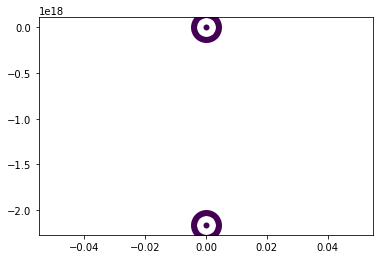

In [ ]:
import matplotlib.pyplot as plt
x = np.array([scores])
y = np.array([scores1])
lw=25
plt.scatter(range(len(x)), scores1[0], c=scores[0], marker='o',lw=lw)
plt.scatter(range(len(x)), scores1[1], c=scores1[1], marker='o',lw=lw)

In [ ]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X,Y, test_size = 0.2,random_state=10)

In [ ]:
MLR=LinearRegression()
MLR.fit(X_train1, Y_train1)

LinearRegression()

In [ ]:
Y_pred1=MLR.predict(X_test1)
Y_pred1

array([-2.32744127e-02,  1.58907635e-01,  2.35342535e-01,  6.62892388e-01,
        5.98477981e-02,  1.64777718e-01,  8.04447906e-01,  1.18958940e-01,
        4.49542772e-02,  1.92574912e-01,  1.27066621e-01,  4.35477089e-01,
        1.14181759e-01,  1.45156338e-01,  9.97132813e-02,  1.88586269e-01,
        2.37535071e-01,  1.01552192e-01,  4.91767319e-01,  2.06450616e-01,
        1.15102807e-01,  1.36991419e-01,  3.19411884e-02,  2.45523177e-01,
        7.67898471e-02,  2.47458879e-01,  5.00886511e-01,  3.59622709e-01,
       -8.31812382e-03,  2.79837639e-01,  1.78003541e-01,  3.85899700e-01,
        3.23497417e-01,  6.72191403e-01,  1.88462016e-01,  3.48531050e-01,
        8.38079526e-02,  3.73318060e-03,  1.79808438e-01,  2.86780850e-01,
        1.40151144e-01,  8.24565957e-01,  1.07292915e-01,  2.81052229e-01,
        5.49195780e-02,  5.45811498e-02,  2.06334776e-01,  8.96472231e-02,
        1.48176341e-01,  3.45155894e-01,  1.60608152e-01,  3.11035137e-01,
        1.98651305e-01,  

In [ ]:
mean_squared_error(Y_test1, Y_pred1)

6.687234471582112e+17

In [ ]:
lasso = linear_model.Lasso()
cross_val_score(lasso, X,Y, cv=10)

array([-9.15464620e-04, -1.28517700e-05, -5.91587753e-03, -6.83979998e-03,
       -8.92945446e-05, -1.33802588e-04, -4.65458631e-04, -4.56589502e-03,
       -2.61529883e-03, -3.20306921e-03])